In [1]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import multiprocessing

%matplotlib inline

In [2]:
data = pd.read_csv('Irisdata.txt')
data.head(5)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data['class'] = pd.factorize(data['Species'])[0]
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species,class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


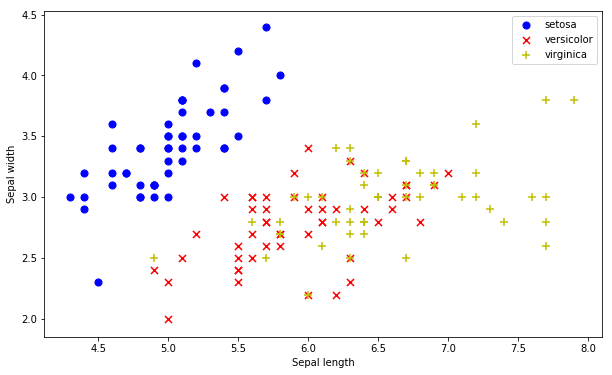

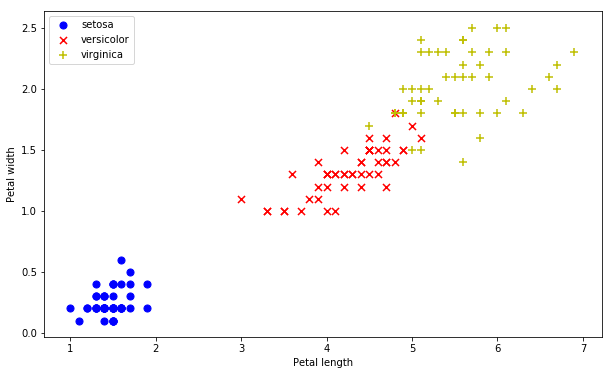

In [5]:
setosa = data[data['class'].isin([0])]
versicolor = data[data['class'].isin([1])]
virginica = data[data['class'].isin([2])]
fig, ax = plt.subplots(figsize=(10,6))   
ax.scatter(setosa['Sepal length'],setosa['Sepal width'],s=50, c='b', marker='o', label='setosa')  
ax.scatter(versicolor['Sepal length'],versicolor['Sepal width'],s=50, c='r', marker='x', label='versicolor')  
ax.scatter(virginica['Sepal length'],virginica['Sepal width'],s=50, c='y', marker='+', label='virginica') 
ax.legend()  
ax.set_xlabel('Sepal length')  
ax.set_ylabel('Sepal width')
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.scatter(setosa['Petal length'],setosa['Petal width'],s=50, c='b', marker='o', label='setosa')  
ax2.scatter(versicolor['Petal length'],versicolor['Petal width'],s=50, c='r', marker='x', label='versicolor')  
ax2.scatter(virginica['Petal length'],virginica['Petal width'],s=50, c='y', marker='+', label='virginica')
ax2.legend()
ax2.set_xlabel('Petal length')  
ax2.set_ylabel('Petal width')
plt.show()

In [7]:
train=data.sample(frac=0.7,random_state=200)
test=data.drop(train.index)

# Logistic Regression

In [8]:
logistic = linear_model.LogisticRegression(C=1e5)
X = train[['Sepal length','Sepal width','Petal length','Petal width']]
Y = train['class']
model = logistic.fit(X,Y)

In [9]:
model.coef_

array([[  1.56309361,   4.93847313,  -7.90546601,  -4.02326528],
       [ -0.33858008,  -3.11595194,   1.95295613,  -4.24650943],
       [  7.51535581,  -9.13476228,  15.40009388,  29.10360998]])

In [10]:
model.intercept_

array([   0.93007257,    8.03822906, -144.55086964])

In [11]:
model

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [12]:
model.predict([[4.9,3.0,1.4,0.2]])

array([0], dtype=int64)

In [13]:
test['predict']=model.predict(test[['Sepal length','Sepal width','Petal length','Petal width']])
test['pos_diff']=test['class']+test['predict']

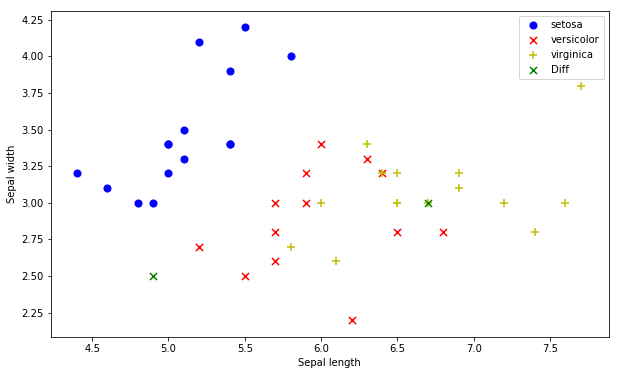

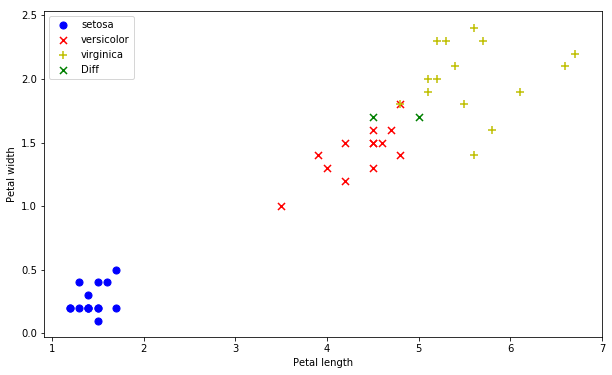

In [14]:
p_setosa = test[test['pos_diff'].isin([0])]
p_versicolor = test[test['pos_diff'].isin([2])]
p_virginica = test[test['pos_diff'].isin([4])]
predict_diff=test[test['pos_diff'].isin([1,3])]

fig, ax = plt.subplots(figsize=(10,6))   
ax.scatter(p_setosa['Sepal length'],p_setosa['Sepal width'],s=50, c='b', marker='o', label='setosa')  
ax.scatter(p_versicolor['Sepal length'],p_versicolor['Sepal width'],s=50, c='r', marker='x', label='versicolor')  
ax.scatter(p_virginica['Sepal length'],p_virginica['Sepal width'],s=50, c='y', marker='+', label='virginica') 
ax.scatter(predict_diff['Sepal length'], predict_diff['Sepal width'], s=50, c='g', marker='x', label='Diff') 
ax.legend()  
ax.set_xlabel('Sepal length')  
ax.set_ylabel('Sepal width')
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.scatter(p_setosa['Petal length'],p_setosa['Petal width'],s=50, c='b', marker='o', label='setosa')  
ax2.scatter(p_versicolor['Petal length'],p_versicolor['Petal width'],s=50, c='r', marker='x', label='versicolor')  
ax2.scatter(p_virginica['Petal length'],p_virginica['Petal width'],s=50, c='y', marker='+', label='virginica')
ax2.scatter(predict_diff['Petal length'], predict_diff['Petal width'], s=50, c='g', marker='x', label='Diff') 
ax2.legend()
ax2.set_xlabel('Petal length')  
ax2.set_ylabel('Petal width')
plt.show()

In [15]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X) - Y) ** 2))

Mean squared error: 0.03


In [16]:
x = data[['Sepal length','Sepal width','Petal length','Petal width']]
y = data['class']
predicted = cross_val_predict(logistic, x, y, cv=10)
print (classification_report(y, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.94      0.95        50
          2       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150



# Decision trees

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
import graphviz

In [18]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
#X2 = data[['Sepal length','Sepal width','Petal length','Petal width']]
#Y2 = data['class']
model2 = dt.fit(X,Y)

In [19]:
model2.tree_

In [20]:
model2.classes_

array([0, 1, 2], dtype=int64)

## visualizing the tree

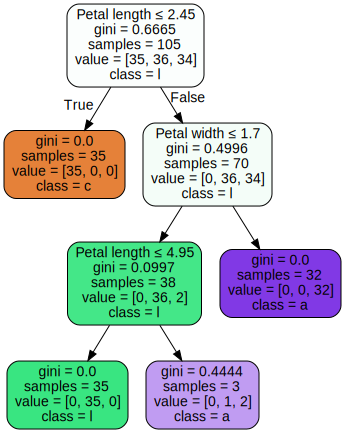

In [21]:
dot_data = export_graphviz(model2, out_file=None, 
                         feature_names=['Sepal length','Sepal width','Petal length','Petal width'],  
                         class_names='class',  
                         filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [22]:
predicted = cross_val_predict(dt, x, y, cv=10)
print (classification_report(y, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc= RandomForestClassifier(n_estimators= 1000)
model3 = rfc.fit(X,Y)

In [25]:
model3.feature_importances_

array([ 0.0863522 ,  0.02389012,  0.43174673,  0.45801095])

In [26]:
predicted3 = cross_val_predict(rfc, x, y, cv=10)
print (classification_report(y, predicted3))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



In [27]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y, model3.predict(x))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]])